In [1]:
import pandas as pd
import imblearn
import datetime
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set_style("whitegrid")
from datetime import datetime, timedelta

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_roc_curve, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import fbeta_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("Embedded_features_2018_2022_prior.csv")
df.drop("Unnamed: 0",axis=1, inplace=True)
X_df=df.drop(['DepDelay','Label'],axis=1)

y_df=df['Label']
#df.tail(5)


# 4 hour prediction horizon

## Logistic Regression

In [3]:
selected_features=['Temperature_F', 'Dew_Point_F', 'Humidity_%', 'Wind_Speed_mph',
       'Wind_Gust_mph', 'Pressure_in', 'Precip_in', 'Carrier_delay_probabilty',
        'Delaym4h_s',"Destination_delay_probabilty",
       'Yesterday_delay_probabilty', 'Wind_x', 'Wind_y', 'DayOfWeek_x',
       'DayOfWeek_y', 'Month_x', 'Month_y', 'Hour_x', 'Hour_y']#
X_df=X_df[selected_features]

### Under sampling

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test=train_test_split(X_df, y_df.values.flatten(), test_size=.3,
                                                              shuffle=True)

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
X_test_under, y_test_under = undersample.fit_resample(X_test, y_test)

#################



In [5]:
clf_log_under= LogisticRegression(max_iter=200)
clf_log_under = clf_log_under.fit(X_train_under, y_train_under)

y_pred_train_lunder = clf_log_under.predict(X_train_under)
print("Training set",metrics.accuracy_score(y_train_under, y_pred_train_lunder))
print(metrics.confusion_matrix(y_train_under, y_pred_train_lunder))
target_names= ['On Time','Late']
print(classification_report(y_train_under, y_pred_train_lunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_under, y_pred_train_lunder, beta = 2, average = None))
print()
print()
y_pred_test_lunder = clf_log_under.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_test_lunder))
print(metrics.confusion_matrix(y_test, y_pred_test_lunder))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_test_lunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_test_lunder, beta = 2, average = None))

Training set 0.666053688724825
[[51518 22166]
 [27047 46637]]
              precision    recall  f1-score   support

     On Time      0.656     0.699     0.677     73684
        Late      0.678     0.633     0.655     73684

    accuracy                          0.666    147368
   macro avg      0.667     0.666     0.666    147368
weighted avg      0.667     0.666     0.666    147368

F2 score:  [0.69003298 0.64143049]


Test set 0.6862312181499206
[[95122 40820]
 [11762 19878]]
              precision    recall  f1-score   support

     On Time      0.890     0.700     0.783    135942
        Late      0.327     0.628     0.431     31640

    accuracy                          0.686    167582
   macro avg      0.609     0.664     0.607    167582
weighted avg      0.784     0.686     0.717    167582

F2 score:  [0.73097447 0.53076504]


### maxiter - 1000 log under

Training set 0.6656170686355678
[[51372 22307]
 [26967 46712]]
              precision    recall  f1-score   support

     On Time      0.656     0.697     0.676     73679
        Late      0.677     0.634     0.655     73679

    accuracy                          0.666    147358
   macro avg      0.666     0.666     0.665    147358
weighted avg      0.666     0.666     0.665    147358

Test set 0.6837190151686935
[[94388 41549]
 [11454 20191]]
              precision    recall  f1-score   support

     On Time      0.892     0.694     0.781    135937
        Late      0.327     0.638     0.432     31645

    accuracy                          0.684    167582
   macro avg      0.609     0.666     0.607    167582
weighted avg      0.785     0.684     0.715    167582

In [6]:
#Aug 2022 data

df_aug=pd.read_csv("Embedded_features_Aug2022_posterior.csv")
df_aug.drop("Unnamed: 0",axis=1, inplace=True)
X_post_df=df_aug.drop(['DepDelay','Label'],axis=1)


X_post_df=X_post_df[selected_features]
y_post_df=df_aug['Label']

In [7]:
# Testing log reg on August data (under model)
y_pred_aug_lunder = clf_log_under.predict(X_post_df)
print("Test set",metrics.accuracy_score(y_post_df, y_pred_aug_lunder))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_lunder))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_lunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_lunder, beta = 2, average = None))

Test set 0.5924405039664022
[[3973 3773]
 [ 594 2375]]
              precision    recall  f1-score   support

     On Time      0.870     0.513     0.645      7746
        Late      0.386     0.800     0.521      2969

    accuracy                          0.592     10715
   macro avg      0.628     0.656     0.583     10715
weighted avg      0.736     0.592     0.611     10715

F2 score:  [0.55877472 0.65884376]


In [26]:
(5*.87*.506)/((4*.87)+.506)

0.5522077270446563

### Over Sampling

In [8]:



oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
X_test_over, y_test_over = oversample.fit_resample(X_test, y_test)

clf_log_over= LogisticRegression(max_iter=1000)
clf_log_over = clf_log_over.fit(X_train_over, y_train_over)

y_pred_train_lover = clf_log_over.predict(X_train_over)
print("Training set",metrics.accuracy_score(y_train_over, y_pred_train_lover))
print(metrics.confusion_matrix(y_train_over, y_pred_train_lover))
target_names= ['On Time','Late']
print(classification_report(y_train_over, y_pred_train_lover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_over, y_pred_train_lover, beta = 2, average = None))
print()
print()
y_pred_test_lover = clf_log_over.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_test_lover))
print(metrics.confusion_matrix(y_test, y_pred_test_lover))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_test_lover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_test_lover, beta = 2, average = None))

Training set 0.6663925127623369
[[221901  95439]
 [116295 201045]]
              precision    recall  f1-score   support

     On Time      0.656     0.699     0.677    317340
        Late      0.678     0.634     0.655    317340

    accuracy                          0.666    634680
   macro avg      0.667     0.666     0.666    634680
weighted avg      0.667     0.666     0.666    634680

F2 score:  [0.69018124 0.64197008]


Test set 0.6865057106371806
[[95186 40756]
 [11780 19860]]
              precision    recall  f1-score   support

     On Time      0.890     0.700     0.784    135942
        Late      0.328     0.628     0.431     31640

    accuracy                          0.687    167582
   macro avg      0.609     0.664     0.607    167582
weighted avg      0.784     0.687     0.717    167582

F2 score:  [0.73137411 0.53051673]


In [9]:
# Testing log reg on August data (over model)
y_pred_aug_lover = clf_log_over.predict(X_post_df)
print("Test set",metrics.accuracy_score(y_post_df, y_pred_aug_lover))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_lover))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_lover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_lover, beta = 2, average = None))

Test set 0.5911339244050396
[[3953 3793]
 [ 588 2381]]
              precision    recall  f1-score   support

     On Time      0.871     0.510     0.643      7746
        Late      0.386     0.802     0.521      2969

    accuracy                          0.591     10715
   macro avg      0.628     0.656     0.582     10715
weighted avg      0.736     0.591     0.609     10715

F2 score:  [0.55636875 0.65955679]


# XGBoost

### Under sampling

In [24]:
import xgboost
from xgboost import XGBClassifier

### tuned parameters for under sampling
params={'max_depth': 8, 'eta': .3, "eval_metric":"aucpr", 'sub_sample': 0.5, 'gamma': 0.05,
        
       'objective': 'binary:logistic',"n_estimators":200, 'reg_alpha': 1, 'reg_lambda': 1,
        
       'scale_pos_weight': 2, 'min_child_weight': 1.5}

clf_xgb_under3 = XGBClassifier(**params)
#eval set helps to keep an eye at over fitting
clf_xgb_under3 = clf_xgb_under3.fit(X_train_under, y_train_under)

y_pred_train_gunder = clf_xgb_under3.predict(X_train_under)
print("Training set",metrics.accuracy_score(y_train_under, y_pred_train_gunder))
print(metrics.confusion_matrix(y_train_under, y_pred_train_gunder))
target_names= ['On Time','Late']
print(classification_report(y_train_under, y_pred_train_gunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_under, y_pred_train_gunder, beta = 2, average = None))
y_pred_test_gunder = clf_xgb_under3.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_test_gunder))
print(metrics.confusion_matrix(y_test, y_pred_test_gunder))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_test_gunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_test_gunder, beta = 2, average = None))
y_pred_test_gunder2 = clf_xgb_under3.predict(X_test_under)
print("Test set2",metrics.accuracy_score(y_test_under, y_pred_test_gunder2))
print(metrics.confusion_matrix(y_test_under, y_pred_test_gunder2))
target_names= ['On Time','Late']
print(classification_report(y_test_under, y_pred_test_gunder2, target_names=target_names, digits=3))



[13:07:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

Training set 0.8515281472232777
[[54611 19073]
 [ 2807 70877]]
              precision    recall  f1-score   support

     On Time      0.951     0.741     0.833     73684
        Late      0.788     0.962     0.866     73684

    accuracy                          0.852    147368
   macro avg      0.870     0.852     0.850    147368
weighted avg      0.870     0.852     0.850    147368

F2 score:  [0.7753852  0.92123186]
Test set 0.6528624792638827
[[82228 53714]
 [ 4460 27180]]
              precision    recall  f1-score   support

     On Time      0.949     0.605     0.739    135942
        Late      0.336     0.859     0.483     31640

    accuracy                          0.653    167582
   macro avg      0.642     0.732     0.611    167582
weighted avg      0.833     0.653     0.690 

In [25]:
# Testing xgb on August data (under model)
y_pred_aug_gunder = clf_xgb_under3.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_gunder))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_gunder))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_gunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_gunder, beta = 2, average = None))

Aug set 0.4918338777414839
[[2754 4992]
 [ 453 2516]]
              precision    recall  f1-score   support

     On Time      0.859     0.356     0.503      7746
        Late      0.335     0.847     0.480      2969

    accuracy                          0.492     10715
   macro avg      0.597     0.601     0.492     10715
weighted avg      0.714     0.492     0.497     10715

F2 score:  [0.40273756 0.64898886]


### Over sampling

In [26]:

### tuned parameters for over sampling


params={'max_depth': 5, 'eta': .1, "eval_metric":"aucpr", 'sub_sample': 0.5, 'gamma': 0.8,
        
       'objective': 'binary:logistic',"n_estimators":100, 'reg_alpha': 1, 'reg_lambda': 0,
        
       'scale_pos_weight': 1.15, 'min_child_weight': 1}

clf_xgb_over3 = XGBClassifier(**params)
#eval set helps to keep an eye at over fitting
clf_xgb_over3 = clf_xgb_over3.fit(X_train_over, y_train_over)

y_pred_train_gover = clf_xgb_over3.predict(X_train_over)
print("Training set",metrics.accuracy_score(y_train_over, y_pred_train_gover))
print(metrics.confusion_matrix(y_train_over, y_pred_train_gover))
target_names= ['On Time','Late']
print(classification_report(y_train_over, y_pred_train_gover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_over, y_pred_train_gover, beta = 2, average = None))
y_pred_test_gover = clf_xgb_over3.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_test_gover))
print(metrics.confusion_matrix(y_test, y_pred_test_gover))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_test_gover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_test_gover, beta = 2, average = None))
y_pred_test_gover2 = clf_xgb_over3.predict(X_test_over)
print("Test set2",metrics.accuracy_score(y_test_over, y_pred_test_gover2))
print(metrics.confusion_matrix(y_test_over, y_pred_test_gover2))
target_names= ['On Time','Late']
print(classification_report(y_test_over, y_pred_test_gover2, target_names=target_names, digits=3))






[13:08:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

Training set 0.691505955757232
[[215650 101690]
 [ 94105 223235]]
              precision    recall  f1-score   support

     On Time      0.696     0.680     0.688    317340
        Late      0.687     0.703     0.695    317340

    accuracy                          0.692    634680
   macro avg      0.692     0.692     0.691    634680
weighted avg      0.692     0.692     0.691    634680

F2 score:  [0.68281917 0.70011008]
Test set 0.6792674630926949
[[92053 43889]
 [ 9860 21780]]
              precision    recall  f1-score   support

     On Time      0.903     0.677     0.774    135942
        Late      0.332     0.688     0.448     31640

    accuracy                          0.679    167582
   macro avg      0.617     0.683     0.611    167582
weighted avg      0.795     0.679     0.7

In [28]:
# Testing xgb on August data (over model)
y_pred_aug_gover = clf_xgb_over3.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_gover))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_gover))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_gover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_gover, beta = 2, average = None))


Aug set 0.5748950069995333
[[3688 4058]
 [ 497 2472]]
              precision    recall  f1-score   support

     On Time      0.881     0.476     0.618      7746
        Late      0.379     0.833     0.520      2969

    accuracy                          0.575     10715
   macro avg      0.630     0.654     0.569     10715
weighted avg      0.742     0.575     0.591     10715

F2 score:  [0.5243254  0.67152016]


# AdaBoost

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf_ada= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,min_samples_leaf=5), n_estimators=50)
clf_ada = clf_ada.fit(X_train_over, y_train_over)

y_pred = clf_ada.predict(X_train_over)
print("Training set",metrics.accuracy_score(y_train_over, y_pred))
print(metrics.confusion_matrix(y_train_over, y_pred))
target_names= ['On Time','Late']
print(classification_report(y_train_over, y_pred, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_over, y_pred, beta = 2, average = None))

y_pred = clf_ada.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred,beta = 2, average = None))


Training set 0.8874456418982795
[[278492  38848]
 [ 32588 284752]]
              precision    recall  f1-score   support

     On Time      0.895     0.878     0.886    317340
        Late      0.880     0.897     0.889    317340

    accuracy                          0.887    634680
   macro avg      0.888     0.887     0.887    634680
weighted avg      0.888     0.887     0.887    634680

F2 score:  [0.88105844 0.89378264]
Test set 0.7987254001026364
[[113050  22892]
 [ 10838  20802]]
              precision    recall  f1-score   support

     On Time      0.913     0.832     0.870    135942
        Late      0.476     0.657     0.552     31640

    accuracy                          0.799    167582
   macro avg      0.694     0.745     0.711    167582
weighted avg      0.830     0.799     0.810    167582

F2 score:  [0.84661862 0.61091076]


In [12]:
y_pred_aug_ada = clf_ada.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_ada))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_ada))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_ada, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_ada,beta = 2, average = None))

Aug set 0.6208119458702753
[[5389 2357]
 [1706 1263]]
              precision    recall  f1-score   support

     On Time      0.760     0.696     0.726      7746
        Late      0.349     0.425     0.383      2969

    accuracy                          0.621     10715
   macro avg      0.554     0.561     0.555     10715
weighted avg      0.646     0.621     0.631     10715

F2 score:  [0.70760787 0.40752452]


In [14]:
#Under sampling
clf_ada_und= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,min_samples_leaf=5), n_estimators=50)
clf_ada_und = clf_ada.fit(X_train_under, y_train_under)

y_pred = clf_ada_und.predict(X_train_under)
print("Training set",metrics.accuracy_score(y_train_under, y_pred))
print(metrics.confusion_matrix(y_train_under, y_pred))
target_names= ['On Time','Late']
print(classification_report(y_train_under, y_pred, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_under, y_pred, beta = 2, average = None))

y_pred = clf_ada_und.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred,beta = 2, average = None))

y_pred_aug_ada = clf_ada_und.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_ada))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_ada))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_ada, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_ada,beta = 2, average = None))

Training set 0.9074018782910809
[[67117  6567]
 [ 7079 66605]]
              precision    recall  f1-score   support

     On Time      0.905     0.911     0.908     73684
        Late      0.910     0.904     0.907     73684

    accuracy                          0.907    147368
   macro avg      0.907     0.907     0.907    147368
weighted avg      0.907     0.907     0.907    147368

F2 score:  [0.90961207 0.90518554]
Test set 0.7237352460288098
[[98014 37928]
 [ 8369 23271]]
              precision    recall  f1-score   support

     On Time      0.921     0.721     0.809    135942
        Late      0.380     0.735     0.501     31640

    accuracy                          0.724    167582
   macro avg      0.651     0.728     0.655    167582
weighted avg      0.819     0.724     0.751    167582

F2 score:  [0.75377874 0.61970398]
Aug set 0.5771348576761549
[[4509 3237]
 [1294 1675]]
              precision    recall  f1-score   support

     On Time      0.777     0.582     0.666  

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf_RF=RandomForestClassifier(max_depth= 10, n_estimators= 500)
clf_RF.fit(X_train_over, y_train_over)

y_pred_rfc_train = clf_RF.predict(X_train_over)
print("Training set",metrics.accuracy_score(y_train_over, y_pred_rfc_train))
print(metrics.confusion_matrix(y_train_over, y_pred_rfc_train))
print('F2 score: ', fbeta_score(y_train_over, y_pred_rfc_train,beta = 2, average = None))
target_names= ['On Time','Late']
print(classification_report(y_train_over, y_pred_rfc_train, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_over, y_pred_rfc_train,beta = 2, average = None))
y_pred_rfc_test = clf_RF.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_rfc_test))
print(metrics.confusion_matrix(y_test, y_pred_rfc_test))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_rfc_test, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_rfc_test,beta = 2, average = None))


Training set 0.7101011533371148
[[238165  79175]
 [104818 212522]]
F2 score:  [0.73856803 0.68069904]
              precision    recall  f1-score   support

     On Time      0.694     0.751     0.721    317340
        Late      0.729     0.670     0.698    317340

    accuracy                          0.710    634680
   macro avg      0.711     0.710     0.710    634680
weighted avg      0.711     0.710     0.710    634680

F2 score:  [0.73856803 0.68069904]
Test set 0.7247616092420427
[[101350  34592]
 [ 11533  20107]]
              precision    recall  f1-score   support

     On Time      0.898     0.746     0.815    135942
        Late      0.368     0.635     0.466     31640

    accuracy                          0.725    167582
   macro avg      0.633     0.691     0.640    167582
weighted avg      0.798     0.725     0.749    167582

F2 score:  [0.77171892 0.55464832]


In [19]:
y_pred_aug_rfc = clf_RF.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_rfc))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_rfc))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_rfc, target_names=target_names, digits=2))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_rfc,beta = 2, average = None))

Aug set 0.5969202053196454
[[3975 3771]
 [ 548 2421]]
              precision    recall  f1-score   support

     On Time       0.88      0.51      0.65      7746
        Late       0.39      0.82      0.53      2969

    accuracy                           0.60     10715
   macro avg       0.63      0.66      0.59     10715
weighted avg       0.74      0.60      0.61     10715

F2 score:  [0.55974878 0.66996901]


In [21]:
#Under sampling
clf_RF_und=RandomForestClassifier(max_depth= 10, n_estimators= 500)
clf_RF_und.fit(X_train_under, y_train_under)

y_pred_rfc_train = clf_RF_und.predict(X_train_under)
print("Training set",metrics.accuracy_score(y_train_under, y_pred_rfc_train))
print(metrics.confusion_matrix(y_train_under, y_pred_rfc_train))
print('F2 score: ', fbeta_score(y_train_under, y_pred_rfc_train,beta = 2, average = None))
target_names= ['On Time','Late']
print(classification_report(y_train_under, y_pred_rfc_train, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_under, y_pred_rfc_train,beta = 2, average = None))
y_pred_rfc_test = clf_RF_und.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_rfc_test))
print(metrics.confusion_matrix(y_test, y_pred_rfc_test))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_rfc_test, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_rfc_test,beta = 2, average = None))

y_pred_aug_rfc = clf_RF_und.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_rfc))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_rfc))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_rfc, target_names=target_names, digits=2))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_rfc,beta = 2, average = None))


Training set 0.7135945388415396
[[55548 18136]
 [24071 49613]]
F2 score:  [0.7419161  0.68434556]
              precision    recall  f1-score   support

     On Time      0.698     0.754     0.725     73684
        Late      0.732     0.673     0.702     73684

    accuracy                          0.714    147368
   macro avg      0.715     0.714     0.713    147368
weighted avg      0.715     0.714     0.713    147368

F2 score:  [0.7419161  0.68434556]
Test set 0.7155601436908499
[[99448 36494]
 [11173 20467]]
              precision    recall  f1-score   support

     On Time      0.899     0.732     0.807    135942
        Late      0.359     0.647     0.462     31640

    accuracy                          0.716    167582
   macro avg      0.629     0.689     0.634    167582
weighted avg      0.797     0.716     0.742    167582

F2 score:  [0.75985385 0.55762011]
Aug set 0.5958936070928604
[[3929 3817]
 [ 513 2456]]
              precision    recall  f1-score   support

     On Ti

# Dummy Classifier

In [46]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train_under, y_train_under)

y_pred_rfc_train = dummy_clf.predict(X_train_under)
print("Training set",metrics.accuracy_score(y_train_under, y_pred_rfc_train))
print(metrics.confusion_matrix(y_train_under, y_pred_rfc_train))
print('F2 score: ', fbeta_score(y_train_under, y_pred_rfc_train,beta = 2, average = None))
target_names= ['On Time','Late']
print(classification_report(y_train_under, y_pred_rfc_train, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_under, y_pred_rfc_train,beta = 2, average = None))
y_pred_rfc_test = dummy_clf.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_rfc_test))
print(metrics.confusion_matrix(y_test, y_pred_rfc_test))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_rfc_test, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_rfc_test,beta = 2, average = None))

y_pred_aug_rfc = dummy_clf.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_rfc))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_rfc))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_rfc, target_names=target_names, digits=2))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_rfc,beta = 2, average = None))


Training set 0.5007125020357202
[[36935 36749]
 [36830 36854]]
F2 score:  [0.50115196 0.50027285]
              precision    recall  f1-score   support

     On Time      0.501     0.501     0.501     73684
        Late      0.501     0.500     0.500     73684

    accuracy                          0.501    147368
   macro avg      0.501     0.501     0.501    147368
weighted avg      0.501     0.501     0.501    147368

F2 score:  [0.50115196 0.50027285]
Test set 0.5003341647670991
[[67920 68022]
 [15713 15927]]
              precision    recall  f1-score   support

     On Time      0.812     0.500     0.619    135942
        Late      0.190     0.503     0.276     31640

    accuracy                          0.500    167582
   macro avg      0.501     0.502     0.447    167582
weighted avg      0.695     0.500     0.554    167582

F2 score:  [0.54128062 0.37829736]
Aug set 0.5047130191320579
[[3885 3861]
 [1446 1523]]
              precision    recall  f1-score   support

     On Ti

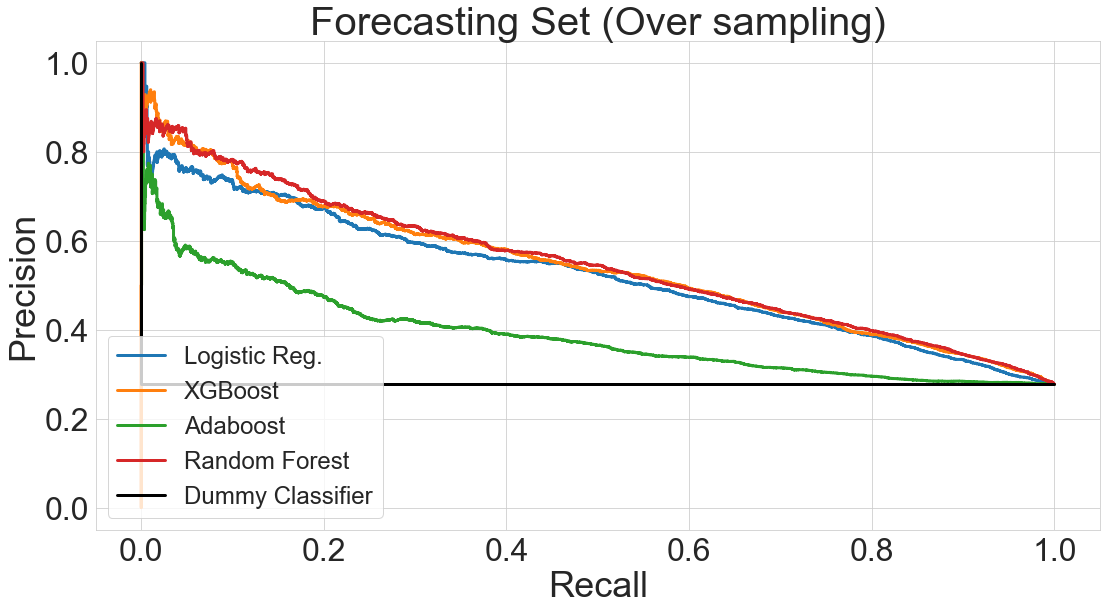

In [47]:
fig, ax = plt.subplots(1,1, figsize=(18,9))
plot_precision_recall_curve(clf_log_over, X_post_df, y_post_df, ax=ax, label="Logistic Reg.",lw=3)
plot_precision_recall_curve(clf_xgb_over3, X_post_df, y_post_df, ax=ax, label="XGBoost",lw=3)
plot_precision_recall_curve(clf_ada, X_post_df, y_post_df, ax=ax, label="Adaboost",lw=3)
plot_precision_recall_curve(clf_RF, X_post_df, y_post_df, ax=ax, label="Random Forest",lw=3)
plot_precision_recall_curve(dummy_clf, X_post_df, y_post_df, ax=ax, label="Dummy Classifier",c='k',lw=3)

ax.legend(loc='lower left', fontsize=24)
ax.set_xlabel("Recall", fontsize=36)
ax.tick_params(axis='both', which='major', labelsize=32),
ax.set_ylabel("Precision", fontsize=36)
plt.title('Forecasting Set (Over sampling)', fontsize = 40)
plt.savefig('RP_over_all.png', dpi = 300, bbox_inches='tight')
plt.show()

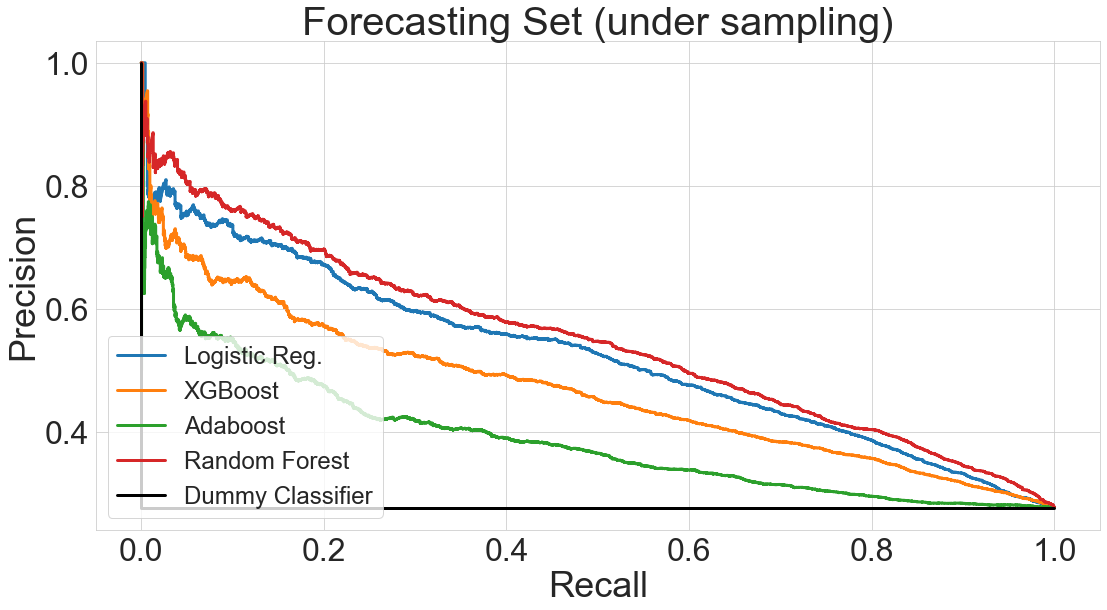

In [48]:
fig, ax = plt.subplots(1,1, figsize=(18,9))
plot_precision_recall_curve(clf_log_under, X_post_df, y_post_df, ax=ax, label="Logistic Reg.",lw=3)
plot_precision_recall_curve(clf_xgb_under3, X_post_df, y_post_df, ax=ax, label="XGBoost",lw=3)
plot_precision_recall_curve(clf_ada_und, X_post_df, y_post_df, ax=ax, label="Adaboost",lw=3)
plot_precision_recall_curve(clf_RF_und, X_post_df, y_post_df, ax=ax, label="Random Forest",lw=3)
plot_precision_recall_curve(dummy_clf, X_post_df, y_post_df, ax=ax, label="Dummy Classifier",c='k',lw=3)

ax.legend(loc='lower left', fontsize=24)
ax.set_xlabel("Recall", fontsize=36)
ax.tick_params(axis='both', which='major', labelsize=32),
ax.set_ylabel("Precision", fontsize=36)
plt.title('Forecasting Set (under sampling)', fontsize = 40)
plt.savefig('RP_under_all.png', dpi = 300, bbox_inches='tight')
plt.show()

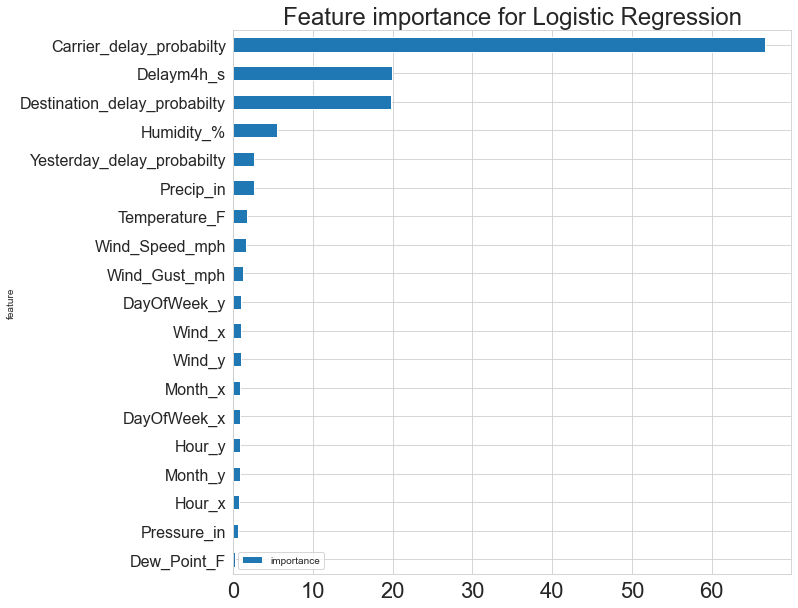

In [82]:
import math
w=clf_log_under.coef_[0]
feature_names=selected_features
feature_importance=pd.DataFrame(feature_names,columns=["feature"])
feature_importance["importance"]=pow(math.e,w)
feature_importance=feature_importance.sort_values(by=["importance"],ascending=True)

feature_importance.plot.barh(x='feature',y='importance',figsize=(10, 10))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=22)
plt.title("Feature importance for Logistic Regression",fontsize=24)
plt.show()
# The estimated coefficients will all be around 1:
# print(clf_log_under.coef_)
# 
# Those values, however, will show that the second parameter
# is more influential
# print(np.std(X_post_df, 0)*clf_log_under.coef_)

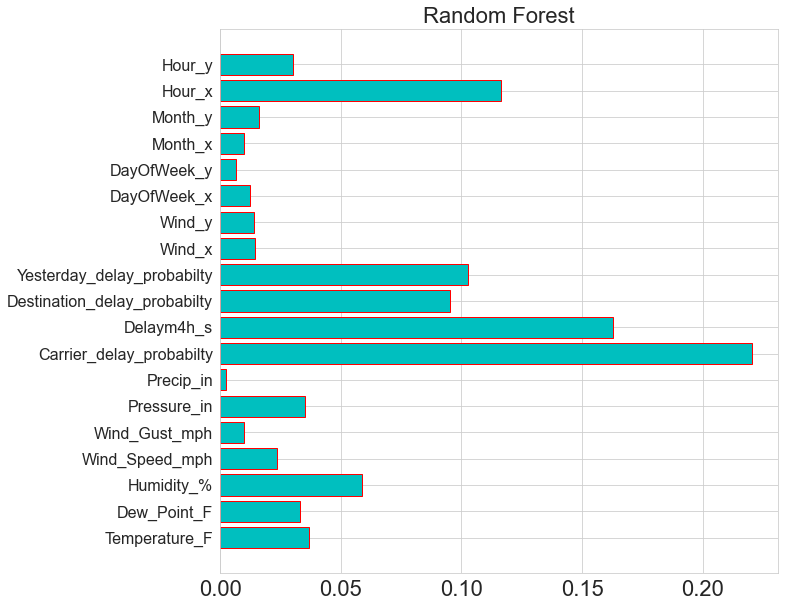

In [84]:

plt.figure(figsize=(10, 10))
plt.barh(feature_names, clf_RF_und.feature_importances_,color="c", edgecolor='red')
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=22)
plt.title("Random Forest",fontsize=22)
plt.savefig('Random_Forest_feature_importance_4hrs.png', dpi = 300, bbox_inches='tight')

### tune the parameters